## **PRODIGY_DS_02**

***Import Dependencies***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

***Load Data***

In [ ]:
titanic = pd.read_csv('Titanic-Dataset.csv')

***Data Exploration***

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


***Checking Missing Values and Replace them***

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [ ]:
# Filling missing values in 'Age' with mean
ages = titanic['Age'].mean().round()
titanic['Age'].fillna(ages,inplace=True)

In [ ]:
titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
# Filling missing values in 'Embarked' with mode
embarked = titanic['Embarked'].mode()[0]
titanic['Embarked'].fillna(embarked,inplace=True)

In [ ]:
# Dropping 'Cabin' column due to higher number of missing values
titanic.drop('Cabin',axis=1,inplace=True)

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

***Round off float values and change datatype***

In [ ]:
titanic['Age'].apply(np.round)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
type('Age')

str

In [ ]:
titanic['Age'].astype('int')

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    30
889    26
890    32
Name: Age, Length: 891, dtype: int64

***Handling Duplicate Values***

In [ ]:
titanic.duplicated().sum()

0

***Dropping Columns***

In [ ]:
titanic.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

***Label Encoding for 'Sex'***

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
titanic['Sex'] = label_encoder.fit_transform(titanic['Sex'])

In [ ]:
titanic['Sex'].unique()

array([1, 0])

In [ ]:
titanic['Embarked'] = label_encoder.fit_transform(titanic['Embarked'])

In [ ]:
titanic['Embarked'].unique()

array([2, 0, 1])

In [ ]:
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


***Checking Outliers***

<Axes: >

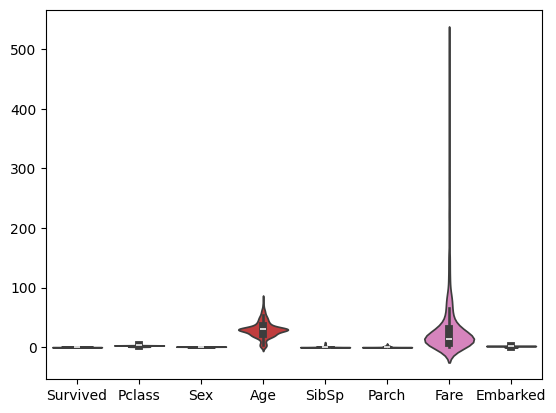

In [ ]:
sns.violinplot(titanic)

***Passengers Distribution***

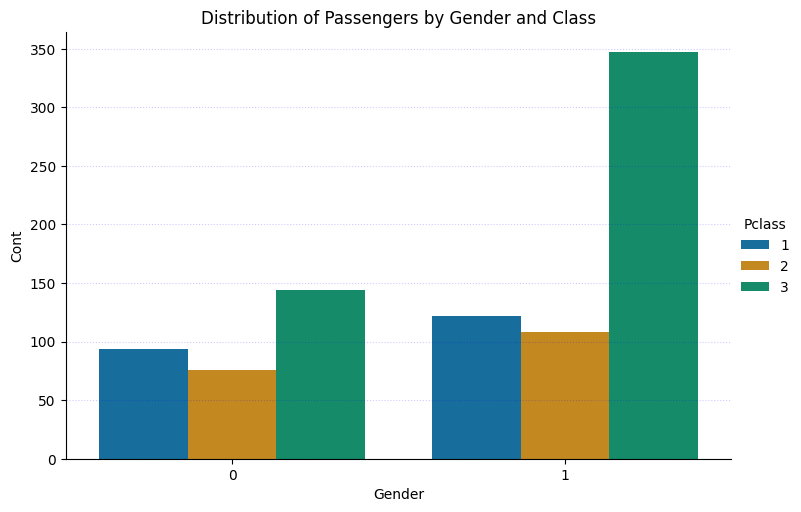

In [ ]:
sns.catplot(data=titanic, x='Sex',kind= 'count', hue='Pclass',palette='colorblind',aspect=1.5,height=5)
plt.title('Distribution of Passengers by Gender and Class')
plt.xlabel('Gender')
plt.ylabel('Cont')
plt.grid(axis='y', ls=':',color='b',alpha=0.2)
plt.show()

***Survival by number of Siblings/Spouses***

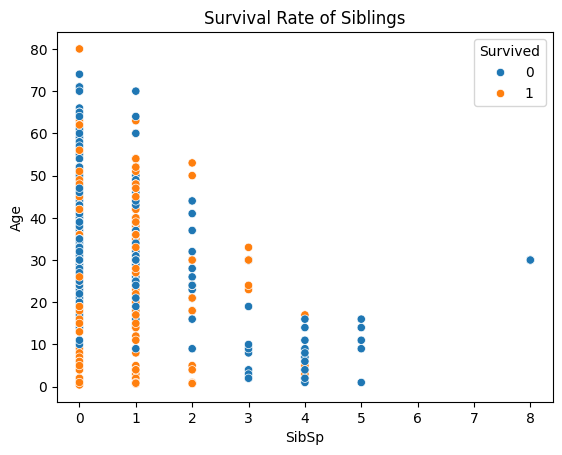

In [ ]:
sns.scatterplot(data=titanic,x='SibSp',y='Age',hue='Survived')
plt.title("Survival Rate of Siblings")
plt.show()

***Survival by number of Parents/Children***

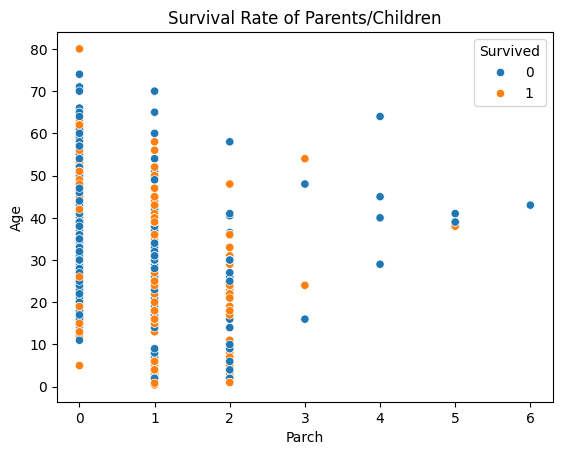

In [ ]:
sns.scatterplot(data=titanic,x='Parch',y='Age',hue='Survived')
plt.title("Survival Rate of Parents/Children")
plt.show()

***Survival by Passenger Class***

<Axes: xlabel='Pclass', ylabel='Age'>

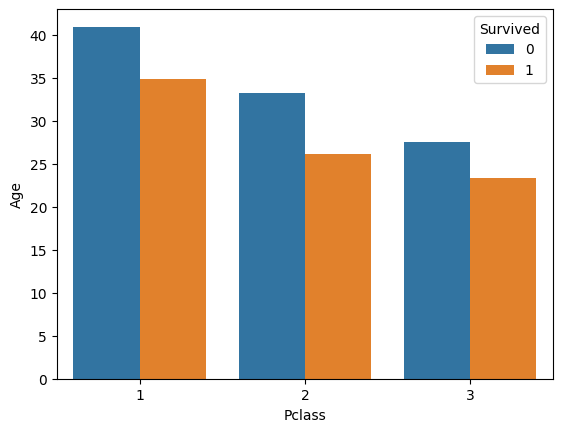

In [ ]:
sns.barplot(x='Pclass', y='Age', hue='Survived', data=titanic, ci=None)

***Survival by Age***

<Axes: xlabel='Age', ylabel='Survived'>

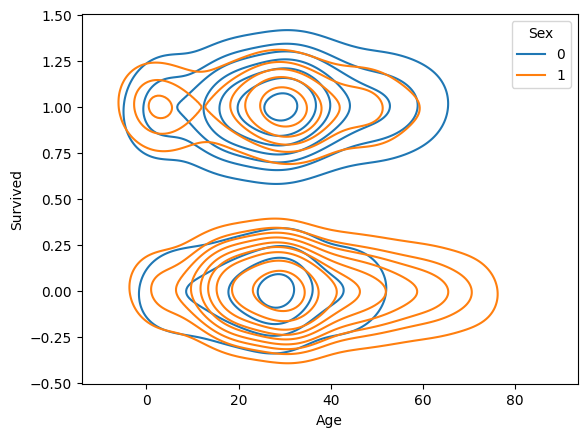

In [ ]:
sns.kdeplot(data=titanic,x="Age",y="Survived",hue='Sex')

***Gender Survival Distribution***

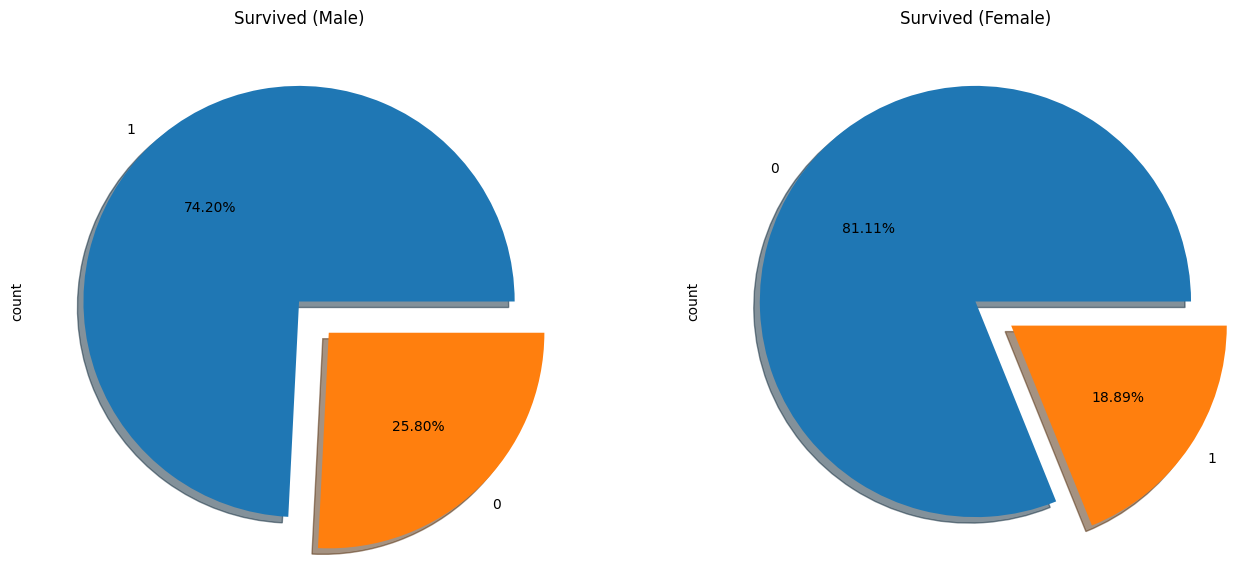

In [ ]:
fig, ax=plt.subplots(1,2, figsize=(16,7))
titanic['Survived'][titanic['Sex']==0].value_counts().plot.pie(explode=[0,0.2],
                                                                    autopct='%.2f%%',ax=ax[0],shadow=True)

titanic['Survived'][titanic['Sex']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%.2f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

***Age Distribution***

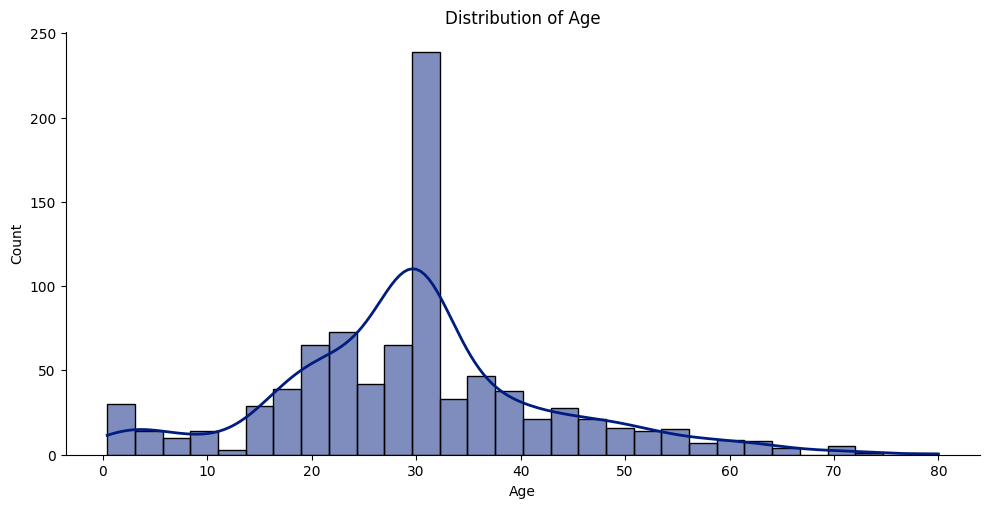

In [ ]:
sns.displot(data=titanic, x='Age', kde=True, color=sns.color_palette('dark')[0],line_kws={'linewidth':2},aspect=2)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Fare Distribution***

<Axes: xlabel='Sex', ylabel='Fare'>

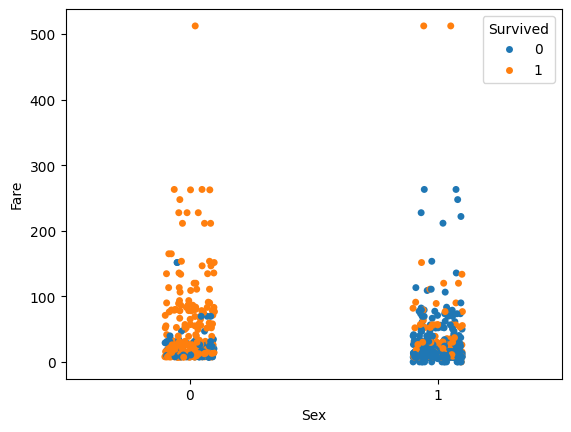

In [ ]:
sns.stripplot(data=titanic,y='Fare',x='Sex',hue='Survived')

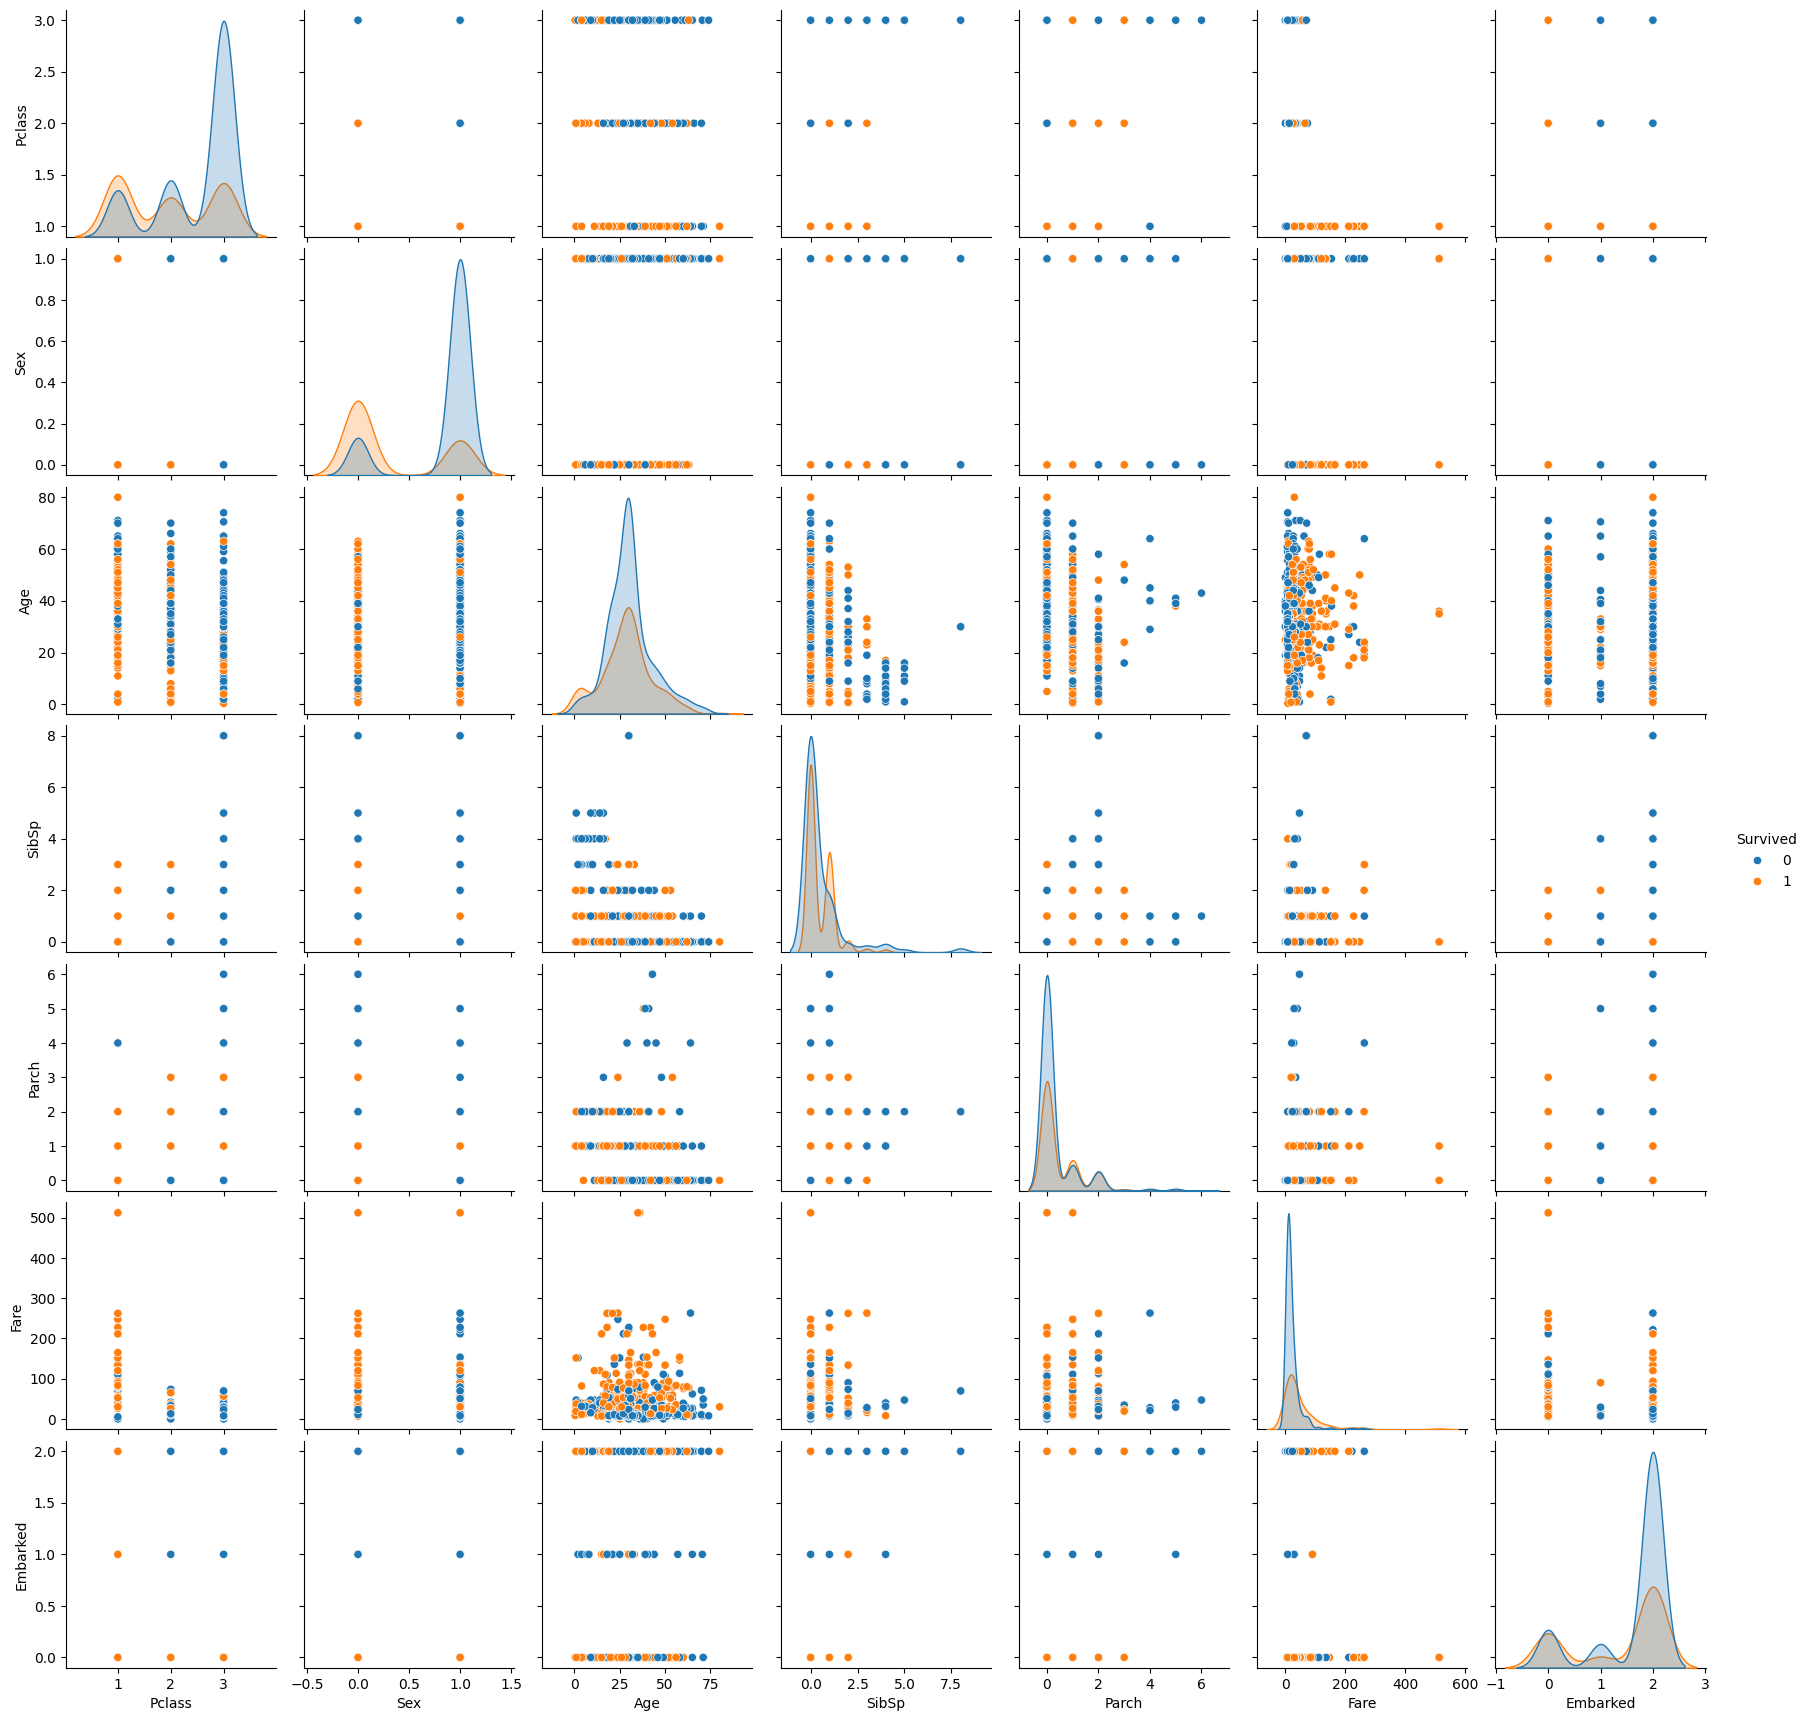

In [ ]:
sns.pairplot(titanic,hue='Survived')